In [1]:
import pandas as pd
data=pd.read_csv("C:\\Users\\Shalini\\Desktop\\Case_Onsite_Modeling_Wine_wine_dataset.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Modelling Helpers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
# Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




In [2]:
X = data.drop('quality', axis=1)
y = data['quality']

In [3]:
seed=8
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [4]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))


In [5]:
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, X_train, y_train, 
                                       cv=4, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(X_train, y_train)
    cv_test_results = accuracy_score(y_test, clf.predict(X_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)

LR: 0.570776 (0.020645) 0.628125
RF: 0.636520 (0.023217) 0.687500
DT: 0.559795 (0.023204) 0.675000


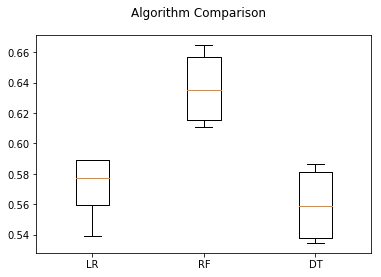

In [6]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

In [7]:
RF = RandomForestClassifier(random_state=seed)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

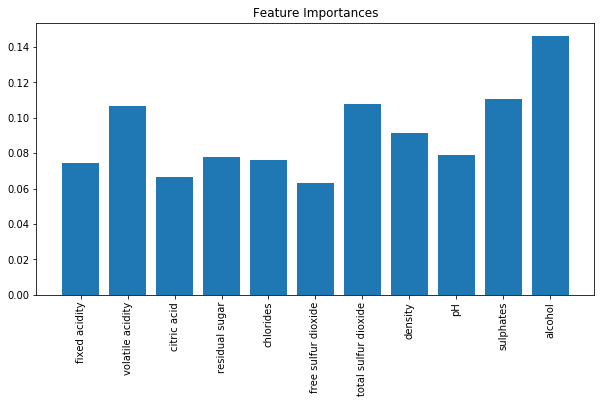

In [8]:
names = list(X_train.columns.values)
importances = RF.feature_importances_
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
y_pos = np.arange(len(names))
plt.bar(y_pos, importances, align='center')
plt.xticks(y_pos, names, rotation=90)
plt.show()

In [9]:
clf = RandomForestClassifier()
grid_values = {'max_features':['auto','sqrt','log2'],'max_depth':[None, 10, 5, 3, 1],
              'min_samples_leaf':[1, 5, 10, 20, 50]}
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
grid_clf = GridSearchCV(clf, param_grid=grid_values, cv=4, scoring='accuracy')
grid_clf.fit(X_train, y_train) 

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 5, 3, 1], 'min_samples_leaf': [1, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [11]:
grid_clf.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [12]:
clf = RandomForestClassifier().fit(X_train, y_train)


In [13]:
y_pred = clf.predict(X_test)

In [14]:
print('Training Accuracy :: ', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy :: ', accuracy_score(y_test, y_pred))


Training Accuracy ::  0.98749022674
Test Accuracy ::  0.690625
